#**Initialization**

In [ ]:
pip install scikit-eLCS

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\users\jowens\appdata\local\programs\python\python310\lib\site-packages (from scikit-eLCS) (1.4.1)



In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
#from google.colab import files

#**Data**

In [2]:
data= pd.read_csv("TrainingDataFashionMnistVgg19Size200.csv")
data_test=pd.read_csv("TestingDataFashionMnistVgg19Size200.csv")

#data= pd.read_csv("/content/TrainingDataFashionMnistVgg19Size200.csv")
#data_test=pd.read_csv("/content/TestingDataFashionMnistVgg19Size200.csv")

In [3]:
classLabel = "Class Label"

X = data.drop(classLabel,axis = 1).values
Y = data[classLabel].values

X_t= data_test.drop(classLabel,axis = 1).values
y_test= data_test[classLabel].values

In [4]:
Y_train=LabelBinarizer().fit_transform(Y)
Y_test=LabelBinarizer().fit_transform(y_test)

In [5]:
iteration=len(X_t)

# **Classifier**

In [86]:
from skeLCS import eLCS
model = eLCS(N=100000, learning_iterations = 10000,nu = 10,selection_method='tournament',track_accuracy_while_fit=True)
trainedModel = model.fit(X,Y)

# **Rule Data**

In [89]:
trainedModel.export_iteration_tracking_data("iterationData_FashionMnist_Vgg19_200_LCS")

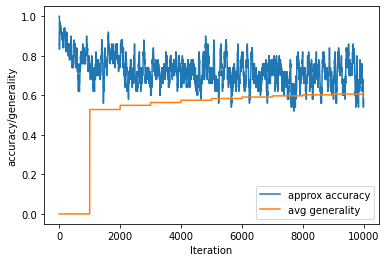

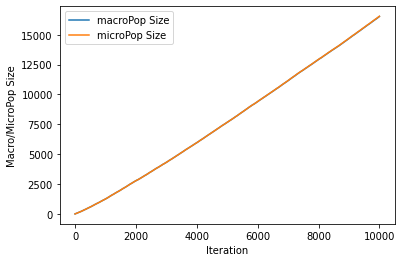

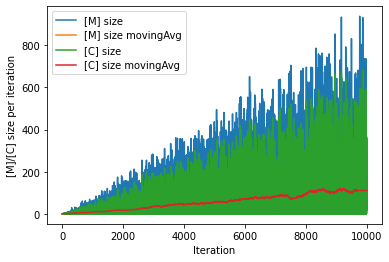

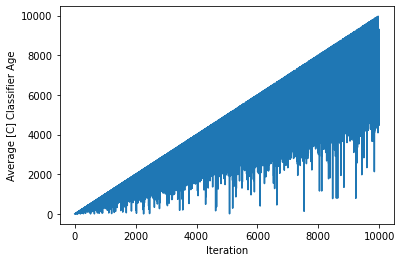

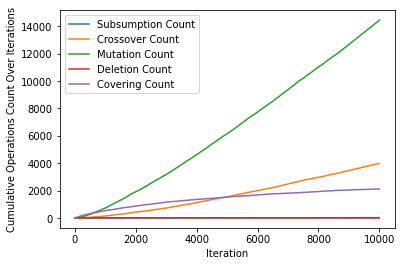

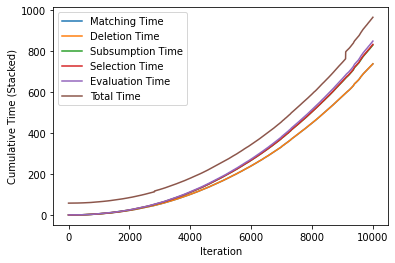

In [92]:
import matplotlib.pyplot as plt
import pandas as pd

def cumulativeFreq(freq):
    a = []
    c = []
    for i in freq:
        a.append(i+sum(c))
        c.append(i)
    return np.array(a)

def movingAvg(a,threshold=300):
    weights = np.repeat(1.0,threshold)/threshold
    conv = np.convolve(a,weights,'valid')
    return np.append(conv,np.full(threshold-1,conv[conv.size-1]),)

dataTracking = pd.read_csv("iterationData_FashionMnist_Vgg19_200_LCS")

iterations = dataTracking["Iteration"].values
accuracy = dataTracking['Accuracy (approx)'].values
generality = dataTracking['Average Population Generality'].values
macroPop = dataTracking["Macropopulation Size"].values
microPop = dataTracking["Micropopulation Size"].values
mSize = dataTracking["Match Set Size"].values
cSize = dataTracking["Correct Set Size"].values
experience = dataTracking["Average Iteration Age of Correct Set Classifiers"].values
subsumption = dataTracking["# Classifiers Subsumed in Iteration"].values
crossover = dataTracking["# Crossover Operations Performed in Iteration"].values
mutation = dataTracking["# Mutation Operations Performed in Iteration"].values
covering = dataTracking["# Covering Operations Performed in Iteration"].values
deletion = dataTracking["# Deletion Operations Performed in Iteration"].values

gTime = dataTracking["Total Global Time"].values
mTime = dataTracking["Total Matching Time"].values
delTime = dataTracking["Total Deletion Time"].values
subTime = dataTracking["Total Subsumption Time"].values
selTime = dataTracking["Total Selection Time"].values
evalTime = dataTracking["Total Evaluation Time"].values

plt.plot(iterations,accuracy,label="approx accuracy")
plt.plot(iterations,generality,label="avg generality")
plt.xlabel('Iteration')
plt.ylabel('accuracy/generality')
plt.legend()
plt.show()

plt.plot(iterations,macroPop,label="macroPop Size")
plt.plot(iterations,microPop,label="microPop Size")
plt.xlabel('Iteration')
plt.ylabel('Macro/MicroPop Size')
plt.legend()
plt.show()

plt.plot(iterations,mSize,label="[M] size")
plt.plot(iterations,movingAvg(mSize),label="[M] size movingAvg")
plt.plot(iterations,cSize,label="[C] size")
plt.plot(iterations,movingAvg(cSize),label="[C] size movingAvg")
plt.xlabel('Iteration')
plt.ylabel('[M]/[C] size per iteration')
plt.legend()
plt.show()

plt.plot(iterations,experience)
plt.ylabel('Average [C] Classifier Age')
plt.xlabel('Iteration')
plt.show()

plt.plot(iterations,cumulativeFreq(subsumption),label="Subsumption Count")
plt.plot(iterations,cumulativeFreq(crossover),label="Crossover Count")
plt.plot(iterations,cumulativeFreq(mutation),label="Mutation Count")
plt.plot(iterations,cumulativeFreq(deletion),label="Deletion Count")
plt.plot(iterations,cumulativeFreq(covering),label="Covering Count")
plt.xlabel('Iteration')
plt.ylabel('Cumulative Operations Count Over Iterations')
plt.legend()
plt.show()

plt.plot(iterations,mTime,label="Matching Time")
plt.plot(iterations,delTime+mTime,label="Deletion Time")
plt.plot(iterations,subTime+delTime+mTime,label="Subsumption Time")
plt.plot(iterations,selTime+subTime+delTime+mTime,label="Selection Time")
plt.plot(iterations,evalTime+selTime+subTime+delTime+mTime,label="Evaluation Time")
plt.plot(iterations,gTime,label="Total Time")
plt.xlabel('Iteration')
plt.ylabel('Cumulative Time (Stacked)')
plt.legend()
plt.show()

In [95]:
trainedModel.export_final_rule_population(filename="RulePopulationFashionMnistVgg19200LCS.csv",DCAL=False)

populationData2 = pd.read_csv("RulePopulationFashionMnistVgg19200LCS.csv")
display(populationData2)

,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,...,Fitness,Accuracy,Numerosity,Avg Match Set Size,TimeStamp GA,Iteration Initialized,Specificity,Deletion Probability,Correct Count,Match Count
0,"-8.9926012415,6.0516752415","-10.403788195,1.3992447950000013",#,"-8.70455168,8.034819220000001","-4.740414812499999,1.2740640124999998","0.6360655375000004,9.5587284625","-6.556566920000001,6.02437648","-11.03153816,1.5050481599999994",#,#,...,0.000213,0.429467,1,393.669987,9976,0,0.480,NaN,274,638
1,"-10.281853151,1.4475827510000006",#,"-9.019948225,-1.2487829749999997","-11.170379295,2.460251295000001","-6.8881233,0.24014789999999975",#,"-2.935755025,3.5643990650000004",#,"-11.4245654565,2.4895106565000003","-7.437053699999999,8.9455455",...,1.000000,1.000000,1,2.000000,2261,1,0.510,NaN,3,3
2,"-5.220223901500001,4.7242978415",#,#,"-11.393936205,-1.111179795",#,#,"-9.180123155,5.287961755000001",#,"-14.266261908,-0.1562128920000001","-7.002890600000001,9.6279298",...,0.130551,0.815789,1,243.655112,9913,2,0.535,NaN,31,38
3,"-7.3114966599999995,7.98776756",#,"-5.810157049999999,10.73490445","-7.835166685,4.360660685","-9.3759708875,4.212296087499999","2.8793678,8.4779014","-3.53724153,2.75323017","-7.53637946,3.9194666600000003",#,"-1.0270678000000002,5.9231258",...,0.000209,0.428571,1,276.461383,9583,3,0.495,NaN,9,21
4,"-5.561255199000001,8.208082599",#,"-4.406026225,7.3760630250000006",#,"-9.5347498,4.7217926","-0.9831050749999992,9.164237074999999","-8.27912049,4.721187690000001","-9.27037196,5.42769476","-6.241786351,0.4212923510000004",#,...,0.217237,0.858407,1,533.295857,9974,4,0.465,NaN,388,452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16525,"-10.286114762,2.9732475620000005",#,"-5.068639225000001,8.718912025000002","-7.833490755000001,4.840604355000001",#,#,#,#,#,#,...,0.100000,1.000000,1,276.157164,9997,9997,0.310,NaN,0,0
16526,#,#,#,"-11.390215575,4.153485975",#,"2.5343421875,12.1568218125",#,"-5.789703879999999,2.64006968","-10.2525553055,-3.0015578945000003","-2.614362399999999,5.5769372",...,0.100000,1.000000,1,288.000000,9998,9998,0.445,NaN,0,0
16527,"-6.863100847,8.001694462000001","-7.3558965600000015,6.6328832800000015","-7.502636174999999,4.598500725",#,"-8.246291925,5.564733524999999",#,#,#,#,#,...,0.100000,1.000000,1,317.617226,9998,9998,0.390,NaN,0,0
16528,"-3.8111586975000007,5.1134120975","-9.504132735,-0.9326183099999996",#,#,"-16.653234286580286,1.8764914249999993",#,"-7.033409665000001,7.015310465000001","-6.425069199999999,4.186323379999999","-14.033816284,-3.2319217005","-4.5680901,6.8500851",...,0.005631,0.750000,1,347.839347,9999,9999,0.405,NaN,0,0


# **Real curve LCS**

## Class 0

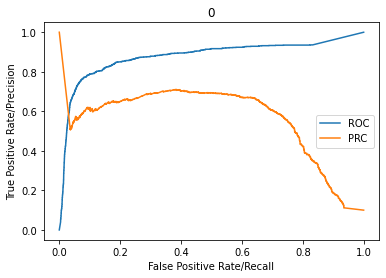

PRC AUC:0.564328980881349
ROC AUC:0.8780936666666666


In [98]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

probs = trainedModel.predict_proba(X_t)
fpr1, tpr1, thresholds1 = roc_curve(Y_test[:,0], probs[:,0])
prec1, recall1, thresholds1 = precision_recall_curve(Y_test[:,0], probs[:,0])

plt.plot(fpr1,tpr1,label="ROC")
plt.plot(recall1,prec1,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('0')
plt.show()

print("PRC AUC:" + str(auc(recall1, prec1)))
print("ROC AUC:" + str(auc(fpr1, tpr1)))

In [101]:
score_true_1=[]

In [104]:
for x in range(0,iteration):
  if probs[x][0]>=0.5:
    score_true_1.append(1)
  else:
    score_true_1.append(0)

score_true_1

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [107]:
score_true_correct_index_1_LCS=[]
score_true_wrong_index_1_LCS=[]

In [110]:
for x in range(0,iteration):
  if score_true_1[x]!=Y_test[x,0]:
    score_true_wrong_index_1_LCS.append(x+1)
  else:
    score_true_correct_index_1_LCS.append(x+1)

In [113]:
correct_0=len(score_true_correct_index_1_LCS)
accuracy_1=correct_0/iteration

## Class 1

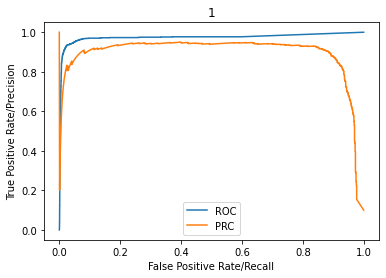

PRC AUC:0.8898011895991852
ROC AUC:0.9742607777777778


In [116]:
fpr2, tpr2, thresholds2 = roc_curve(Y_test[:,1], probs[:, 1])
prec2, recall2, thresholds2 = precision_recall_curve(Y_test[:,1], probs[:, 1])

plt.plot(fpr2,tpr2,label="ROC")
plt.plot(recall2,prec2,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('1')
plt.show()

print("PRC AUC:" + str(auc(recall2, prec2)))
print("ROC AUC:" + str(auc(fpr2, tpr2)))

In [119]:
score_true_2=[]

In [122]:
for x in range(0,iteration):
  if probs[x][1]>=0.5:
    score_true_2.append(1)
  else:
    score_true_2.append(0)

score_true_2

[0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,


In [125]:
score_true_correct_index_2_LCS=[]
score_true_wrong_index_2_LCS=[]

In [127]:
for x in range(0,iteration):
  if score_true_2[x]!=Y_test[x,1]:
    score_true_wrong_index_2_LCS.append(x+1)
  else:
    score_true_correct_index_2_LCS.append(x+1)

In [128]:
correct_1=len(score_true_correct_index_2_LCS)
accuracy_2=correct_1/iteration

## Class 2

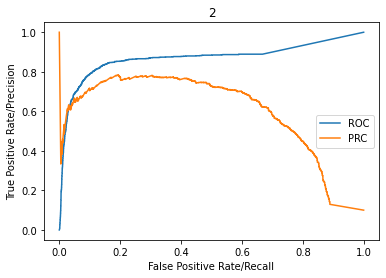

PRC AUC:0.5973840639521918
ROC AUC:0.8689254444444444


In [129]:
fpr3, tpr3, thresholds3 = roc_curve(Y_test[:,2], probs[:, 2])
prec3, recall3, thresholds3 = precision_recall_curve(Y_test[:,2], probs[:, 2])

plt.plot(fpr3,tpr3,label="ROC")
plt.plot(recall3,prec3,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('2')
plt.show()

print("PRC AUC:" + str(auc(recall3, prec3)))
print("ROC AUC:" + str(auc(fpr3, tpr3)))

In [130]:
score_true_3=[]

In [131]:
for x in range(0,iteration):
  if probs[x][2]>=0.5:
    score_true_3.append(1)
  else:
    score_true_3.append(0)

score_true_3

[0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,


In [132]:
score_true_correct_index_3_LCS=[]
score_true_wrong_index_3_LCS=[]

In [133]:
for x in range(0,iteration):
  if score_true_3[x]!=Y_test[x,2]:
    score_true_wrong_index_3_LCS.append(x+1)
  else:
    score_true_correct_index_3_LCS.append(x+1)

In [134]:
correct_2=len(score_true_correct_index_3_LCS)
accuracy_3=correct_2/iteration

## Class 3

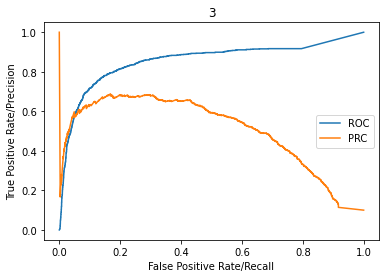

PRC AUC:0.5015955848867862
ROC AUC:0.854694277777778


In [135]:
fpr4, tpr4, thresholds4 = roc_curve(Y_test[:,3], probs[:, 3])
prec4, recall4, thresholds4 = precision_recall_curve(Y_test[:,3], probs[:, 3])

plt.plot(fpr4,tpr4,label="ROC")
plt.plot(recall4,prec4,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('3')
plt.show()

print("PRC AUC:" + str(auc(recall4, prec4)))
print("ROC AUC:" + str(auc(fpr4, tpr4)))

In [136]:
score_true_4=[]

In [137]:
for x in range(0,iteration):
  if probs[x][3]>=0.5:
    score_true_4.append(1)
  else:
    score_true_4.append(0)

score_true_4

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [138]:
score_true_correct_index_4_LCS=[]
score_true_wrong_index_4_LCS=[]

In [139]:
for x in range(0,iteration):
  if score_true_4[x]!=Y_test[x,3]:
    score_true_wrong_index_4_LCS.append(x+1)
  else:
    score_true_correct_index_4_LCS.append(x+1)

In [140]:
correct_3=len(score_true_correct_index_4_LCS)
accuracy_4=correct_3/iteration

## Class 4

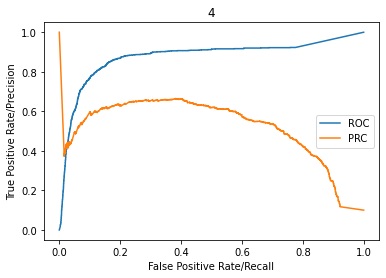

PRC AUC:0.5197564792127215
ROC AUC:0.8750657777777777


In [141]:
fpr5, tpr5, thresholds5 = roc_curve(Y_test[:,4], probs[:, 4])
prec5, recall5, thresholds5 = precision_recall_curve(Y_test[:,4], probs[:, 4])

plt.plot(fpr5,tpr5,label="ROC")
plt.plot(recall5,prec5,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('4')
plt.show()

print("PRC AUC:" + str(auc(recall5, prec5)))
print("ROC AUC:" + str(auc(fpr5, tpr5)))

In [142]:
score_true_5=[]

In [143]:
for x in range(0,iteration):
  if probs[x][4]>=0.5:
    score_true_5.append(1)
  else:
    score_true_5.append(0)

score_true_5

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,


In [144]:
score_true_correct_index_5_LCS=[]
score_true_wrong_index_5_LCS=[]

In [145]:
for x in range(0,iteration):
  if score_true_5[x]!=Y_test[x,4]:
    score_true_wrong_index_5_LCS.append(x+1)
  else:
    score_true_correct_index_5_LCS.append(x+1)

In [146]:
correct_4=len(score_true_correct_index_5_LCS)
accuracy_5=correct_4/iteration

## Class 5

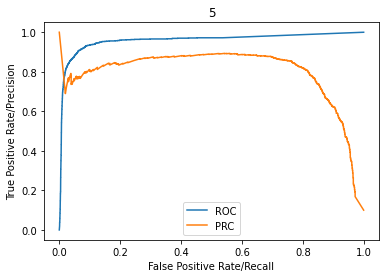

PRC AUC:0.7965000532772901
ROC AUC:0.9595743333333332


In [147]:
fpr6, tpr6, thresholds6 = roc_curve(Y_test[:,5], probs[:, 5])
prec6, recall6, thresholds6 = precision_recall_curve(Y_test[:,5], probs[:, 5])

plt.plot(fpr6,tpr6,label="ROC")
plt.plot(recall6,prec6,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('5')
plt.show()

print("PRC AUC:" + str(auc(recall6, prec6)))
print("ROC AUC:" + str(auc(fpr6, tpr6)))

In [148]:
score_true_6=[]

In [149]:
for x in range(0,iteration):
  if probs[x][5]>=0.5:
    score_true_6.append(1)
  else:
    score_true_6.append(0)

score_true_6

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [150]:
score_true_correct_index_6_LCS=[]
score_true_wrong_index_6_LCS=[]

In [151]:
for x in range(0,iteration):
  if score_true_6[x]!=Y_test[x,5]:
    score_true_wrong_index_6_LCS.append(x+1)
  else:
    score_true_correct_index_6_LCS.append(x+1)

In [152]:
correct_5=len(score_true_correct_index_6_LCS)
accuracy_6=correct_5/iteration

## Class 6

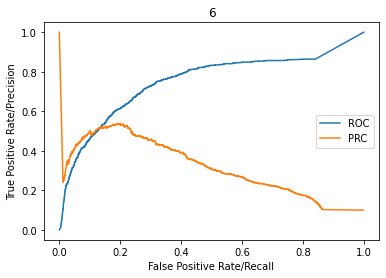

PRC AUC:0.31697820414123673
ROC AUC:0.7484522222222223


In [153]:
fpr7, tpr7, thresholds7 = roc_curve(Y_test[:,6], probs[:, 6])
prec7, recall7, thresholds7 = precision_recall_curve(Y_test[:,6], probs[:, 6])

plt.plot(fpr7,tpr7,label="ROC")
plt.plot(recall7,prec7,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('6')
plt.show()

print("PRC AUC:" + str(auc(recall7, prec7)))
print("ROC AUC:" + str(auc(fpr7, tpr7)))

In [154]:
score_true_7=[]

In [155]:
for x in range(0,iteration):
  if probs[x][6]>=0.5:
    score_true_7.append(1)
  else:
    score_true_7.append(0)

score_true_7

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [156]:
score_true_correct_index_7_LCS=[]
score_true_wrong_index_7_LCS=[]

In [157]:
for x in range(0,iteration):
  if score_true_7[x]!=Y_test[x,6]:
    score_true_wrong_index_7_LCS.append(x+1)
  else:
    score_true_correct_index_7_LCS.append(x+1)

In [158]:
correct_6=len(score_true_correct_index_7_LCS)
accuracy_7=correct_6/iteration

## Class 7

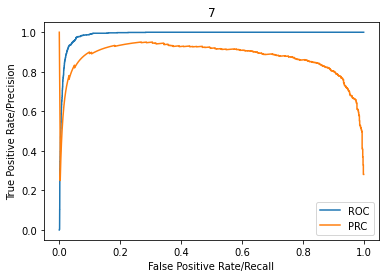

PRC AUC:0.871367135112199
ROC AUC:0.9889008888888889


In [159]:
fpr8, tpr8, thresholds8 = roc_curve(Y_test[:,7], probs[:, 7])
prec8, recall8, thresholds8 = precision_recall_curve(Y_test[:,7], probs[:, 7])

plt.plot(fpr8,tpr8,label="ROC")
plt.plot(recall8,prec8,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('7')
plt.show()

print("PRC AUC:" + str(auc(recall8, prec8)))
print("ROC AUC:" + str(auc(fpr8, tpr8)))

In [160]:
score_true_8=[]

In [161]:
for x in range(0,iteration):
  if probs[x][7]>=0.5:
    score_true_8.append(1)
  else:
    score_true_8.append(0)

score_true_8

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [162]:
score_true_correct_index_8_LCS=[]
score_true_wrong_index_8_LCS=[]

In [163]:
for x in range(0,iteration):
  if score_true_8[x]!=Y_test[x,7]:
    score_true_wrong_index_8_LCS.append(x+1)
  else:
    score_true_correct_index_8_LCS.append(x+1)

In [164]:
correct_7=len(score_true_correct_index_8_LCS)
accuracy_8=correct_7/iteration

## Class 8

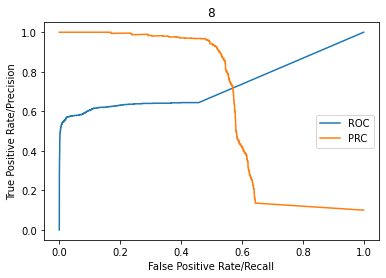

PRC AUC:0.6242589274079575
ROC AUC:0.7298288888888889


In [165]:
fpr9, tpr9, thresholds9 = roc_curve(Y_test[:,8], probs[:, 8])
prec9, recall9, thresholds9 = precision_recall_curve(Y_test[:,8], probs[:, 8])

plt.plot(fpr9,tpr9,label="ROC")
plt.plot(recall9,prec9,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('8')
plt.show()

print("PRC AUC:" + str(auc(recall9, prec9)))
print("ROC AUC:" + str(auc(fpr9, tpr9)))

In [166]:
score_true_9=[]

In [167]:
for x in range(0,iteration):
  if probs[x][8]>=0.5:
    score_true_9.append(1)
  else:
    score_true_9.append(0)

score_true_9

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [168]:
score_true_correct_index_9_LCS=[]
score_true_wrong_index_9_LCS=[]

In [169]:
for x in range(0,iteration):
  if score_true_9[x]!=Y_test[x,8]:
    score_true_wrong_index_9_LCS.append(x+1)
  else:
    score_true_correct_index_9_LCS.append(x+1)

In [170]:
correct_8=len(score_true_correct_index_9_LCS)
accuracy_9=correct_8/iteration

## Class 9

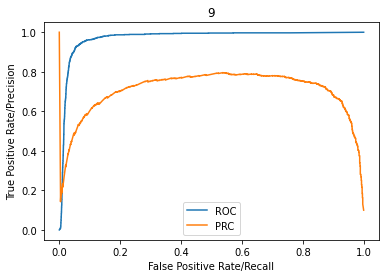

PRC AUC:0.6995620553145269
ROC AUC:0.9718740555555556


In [171]:
fpr10, tpr10, thresholds10 = roc_curve(Y_test[:,9], probs[:, 9])
prec10, recall10, thresholds10 = precision_recall_curve(Y_test[:,9], probs[:, 9])

plt.plot(fpr10,tpr10,label="ROC")
plt.plot(recall10,prec10,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('9')
plt.show()

print("PRC AUC:" + str(auc(recall10, prec10)))
print("ROC AUC:" + str(auc(fpr10, tpr10)))

In [172]:
score_true_10=[]

In [173]:
for x in range(0,iteration):
  if probs[x][9]>=0.5:
    score_true_10.append(1)
  else:
    score_true_10.append(0)

score_true_10

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,


In [174]:
score_true_correct_index_10_LCS=[]
score_true_wrong_index_10_LCS=[]

In [175]:
for x in range(0,iteration):
  if score_true_10[x]!=Y_test[x,9]:
    score_true_wrong_index_10_LCS.append(x+1)
  else:
    score_true_correct_index_10_LCS.append(x+1)

In [176]:
correct_9=len(score_true_correct_index_10_LCS)
accuracy_10=correct_9/iteration

#**Black box instances**

In [177]:
correct='correct'
incorrect='incorrect'

##Class 0

In [179]:
correct_NN_1= pd.read_csv("Vgg19_fashion_mnist_200_Neural_Network_class_0_correct.csv")
incorrect_NN_1=pd.read_csv("Vgg19_fashion_mnist_200_Neural_Network_class_0_incorrect.csv")


#correct_NN_1= pd.read_csv("/content/Vgg_19_fashion_mnist_200_Neural_Network_class_0_correct.csv")
#incorrect_NN_1=pd.read_csv("/content/Vgg_19_fashion_mnist_200_Neural_Network_class_0_incorrect.csv")

correct_nn_1=correct_NN_1[correct].values
incorrect_nn_1=incorrect_NN_1[incorrect].values

In [180]:
correct_1n=len(correct_nn_1)
accuracy_1n=correct_1n/iteration

##Class 1

In [181]:
correct_NN_2= pd.read_csv("Vgg19_fashion_mnist_200_Neural_Network_class_1_correct.csv")
incorrect_NN_2=pd.read_csv("Vgg19_fashion_mnist_200_Neural_Network_class_1_incorrect.csv")

#correct_NN_2= pd.read_csv("/content/Vgg_19_fashion_mnist_200_Neural_Network_class_1_correct.csv")
#incorrect_NN_2=pd.read_csv("/content/Vgg_19_fashion_mnist_200_Neural_Network_class_1_incorrect.csv")

correct_nn_2=correct_NN_2[correct].values
incorrect_nn_2=incorrect_NN_2[incorrect].values

In [182]:
correct_2n=len(correct_nn_2)
accuracy_2n=correct_2n/iteration

##Class 2

In [183]:
correct_NN_3= pd.read_csv("Vgg19_fashion_mnist_200_Neural_Network_class_2_correct.csv")
incorrect_NN_3=pd.read_csv("Vgg19_fashion_mnist_200_Neural_Network_class_2_incorrect.csv")

#correct_NN_3= pd.read_csv("/content/Vgg_19_fashion_mnist_200_Neural_Network_class_2_correct.csv")
#incorrect_NN_3=pd.read_csv("/content/Vgg_19_fashion_mnist_200_Neural_Network_class_2_incorrect.csv")

correct_nn_3=correct_NN_3[correct].values
incorrect_nn_3=incorrect_NN_3[incorrect].values

In [184]:
correct_3n=len(correct_nn_3)
accuracy_3n=correct_3n/iteration

##Class 3

In [185]:
correct_NN_4= pd.read_csv("Vgg19_fashion_mnist_200_Neural_Network_class_3_correct.csv")
incorrect_NN_4=pd.read_csv("Vgg19_fashion_mnist_200_Neural_Network_class_3_incorrect.csv")

#correct_NN_4= pd.read_csv("/content/Vgg_19_fashion_mnist_200_Neural_Network_class_3_correct.csv")
#incorrect_NN_4=pd.read_csv("/content/Vgg_19_fashion_mnist_200_Neural_Network_class_3_incorrect.csv")

correct_nn_4=correct_NN_4[correct].values
incorrect_nn_4=incorrect_NN_4[incorrect].values

In [186]:
correct_4n=len(correct_nn_4)
accuracy_4n=correct_4n/iteration

##Class 4

In [187]:
correct_NN_5= pd.read_csv("Vgg19_fashion_mnist_200_Neural_Network_class_4_correct.csv")
incorrect_NN_5=pd.read_csv("Vgg19_fashion_mnist_200_Neural_Network_class_4_incorrect.csv")

#correct_NN_5= pd.read_csv("/content/Vgg_19_fashion_mnist_200_Neural_Network_class_4_correct.csv")
#incorrect_NN_5=pd.read_csv("/content/Vgg_19_fashion_mnist_200_Neural_Network_class_4_incorrect.csv")

correct_nn_5=correct_NN_5[correct].values
incorrect_nn_5=incorrect_NN_5[incorrect].values

In [188]:
correct_5n=len(correct_nn_5)
accuracy_5n=correct_5n/iteration

##Class 5

In [189]:
correct_NN_6= pd.read_csv("Vgg19_fashion_mnist_200_Neural_Network_class_5_correct.csv")
incorrect_NN_6=pd.read_csv("Vgg19_fashion_mnist_200_Neural_Network_class_5_incorrect.csv")

#correct_NN_6= pd.read_csv("/content/Vgg_19_fashion_mnist_200_Neural_Network_class_5_correct.csv")
#incorrect_NN_6=pd.read_csv("/content/Vgg_19_fashion_mnist_200_Neural_Network_class_5_incorrect.csv")

correct_nn_6=correct_NN_6[correct].values
incorrect_nn_6=incorrect_NN_6[incorrect].values

In [190]:
correct_6n=len(correct_nn_6)
accuracy_6n=correct_6n/iteration

##Class 6

In [191]:
correct_NN_7= pd.read_csv("Vgg19_fashion_mnist_200_Neural_Network_class_6_correct.csv")
incorrect_NN_7=pd.read_csv("Vgg19_fashion_mnist_200_Neural_Network_class_6_incorrect.csv")

#correct_NN_7= pd.read_csv("/content/Vgg_19_fashion_mnist_200_Neural_Network_class_6_correct.csv")
#incorrect_NN_7=pd.read_csv("/content/Vgg_19_fashion_mnist_200_Neural_Network_class_6_incorrect.csv")

correct_nn_7=correct_NN_7[correct].values
incorrect_nn_7=incorrect_NN_7[incorrect].values

In [192]:
correct_7n=len(correct_nn_7)
accuracy_7n=correct_7n/iteration

##Class 7

In [193]:
correct_NN_8= pd.read_csv("Vgg19_fashion_mnist_200_Neural_Network_class_7_correct.csv")
incorrect_NN_8=pd.read_csv("Vgg19_fashion_mnist_200_Neural_Network_class_7_incorrect.csv")

#correct_NN_8= pd.read_csv("/content/Vgg_19_fashion_mnist_200_Neural_Network_class_7_correct.csv")
#incorrect_NN_8=pd.read_csv("/content/Vgg_19_fashion_mnist_200_Neural_Network_class_7_incorrect.csv")

correct_nn_8=correct_NN_8[correct].values
incorrect_nn_8=incorrect_NN_8[incorrect].values

In [194]:
correct_8n=len(correct_nn_8)
accuracy_8n=correct_8n/iteration

##Class 8

In [195]:
correct_NN_9= pd.read_csv("Vgg19_fashion_mnist_200_Neural_Network_class_8_correct.csv")
incorrect_NN_9=pd.read_csv("Vgg19_fashion_mnist_200_Neural_Network_class_8_incorrect.csv")

#correct_NN_9= pd.read_csv("/content/Vgg_19_fashion_mnist_200_Neural_Network_class_8_correct.csv")
#incorrect_NN_9=pd.read_csv("/content/Vgg_19_fashion_mnist_200_Neural_Network_class_8_incorrect.csv")

correct_nn_9=correct_NN_9[correct].values
incorrect_nn_9=incorrect_NN_9[incorrect].values

In [196]:
correct_9n=len(correct_nn_9)
accuracy_9n=correct_9n/iteration

##Class 9

In [197]:
correct_NN_10= pd.read_csv("Vgg19_fashion_mnist_200_Neural_Network_class_9_correct.csv")
incorrect_NN_10=pd.read_csv("Vgg19_fashion_mnist_200_Neural_Network_class_9_incorrect.csv")

#correct_NN_10= pd.read_csv("/content/Vgg_19_fashion_mnist_200_Neural_Network_class_9_correct.csv")
#incorrect_NN_10=pd.read_csv("/content/Vgg_19_fashion_mnist_200_Neural_Network_class_9_incorrect.csv")

correct_nn_10=correct_NN_10[correct].values
incorrect_nn_10=incorrect_NN_10[incorrect].values

In [198]:
correct_10n=len(correct_nn_10)
accuracy_10n=correct_10n/iteration

#**Shared labels**

##Class 0

In [199]:
correct_shared_1=list(set(score_true_correct_index_1_LCS)&set(correct_nn_1))
incorrect_shared_1=list(set(score_true_wrong_index_1_LCS)&set(incorrect_nn_1))

In [200]:
class0_correct_shared=pd.DataFrame(correct_shared_1,columns=['correct'])
class0_wrong_shared=pd.DataFrame(incorrect_shared_1,columns=['incorrect'])

class0_correct_shared.to_csv('Vgg19_fashion_mnist_200_shared_class_0_correct.csv',index=False)
class0_wrong_shared.to_csv('Vgg19_fashion_mnist_200_shared_class_0_incorrect.csv',index=False)

##Class 1

In [201]:
correct_shared_2=list(set(score_true_correct_index_2_LCS)&set(correct_nn_2))
incorrect_shared_2=list(set(score_true_wrong_index_2_LCS)&set(incorrect_nn_2))

In [202]:
class1_correct_shared=pd.DataFrame(correct_shared_2,columns=['correct'])
class1_wrong_shared=pd.DataFrame(incorrect_shared_2,columns=['incorrect'])

class1_correct_shared.to_csv('Vgg19_fashion_mnist_200_shared_class_1_correct.csv',index=False)
class1_wrong_shared.to_csv('Vgg19_fashion_mnist_200_shared_class_1_incorrect.csv',index=False)

##Class 2

In [203]:
correct_shared_3=list(set(score_true_correct_index_3_LCS)&set(correct_nn_3))
incorrect_shared_3=list(set(score_true_wrong_index_3_LCS)&set(incorrect_nn_3))

In [204]:
class2_correct_shared=pd.DataFrame(correct_shared_3,columns=['correct'])
class2_wrong_shared=pd.DataFrame(incorrect_shared_3,columns=['incorrect'])

class2_correct_shared.to_csv('Vgg19_fashion_mnist_200_shared_class_2_correct.csv',index=False)
class2_wrong_shared.to_csv('Vgg19_fashion_mnist_200_shared_class_2_incorrect.csv',index=False)

##Class 3

In [205]:
correct_shared_4=list(set(score_true_correct_index_4_LCS)&set(correct_nn_4))
incorrect_shared_4=list(set(score_true_wrong_index_4_LCS)&set(incorrect_nn_4))

In [206]:
class3_correct_shared=pd.DataFrame(correct_shared_4,columns=['correct'])
class3_wrong_shared=pd.DataFrame(incorrect_shared_4,columns=['incorrect'])

class3_correct_shared.to_csv('Vgg19_fashion_mnist_200_shared_class_3_correct.csv',index=False)
class3_wrong_shared.to_csv('Vgg19_fashion_mnist_200_shared_class_3_incorrect.csv',index=False)

##Class 4

In [207]:
correct_shared_5=list(set(score_true_correct_index_5_LCS)&set(correct_nn_5))
incorrect_shared_5=list(set(score_true_wrong_index_5_LCS)&set(incorrect_nn_5))

In [208]:
class4_correct_shared=pd.DataFrame(correct_shared_5,columns=['correct'])
class4_wrong_shared=pd.DataFrame(incorrect_shared_5,columns=['incorrect'])

class4_correct_shared.to_csv('Vgg19_fashion_mnist_200_shared_class_4_correct.csv',index=False)
class4_wrong_shared.to_csv('Vgg19_fashion_mnist_200_shared_class_4_incorrect.csv',index=False)

##Class 5

In [209]:
correct_shared_6=list(set(score_true_correct_index_6_LCS)&set(correct_nn_6))
incorrect_shared_6=list(set(score_true_wrong_index_6_LCS)&set(incorrect_nn_6))

In [210]:
class5_correct_shared=pd.DataFrame(correct_shared_6,columns=['correct'])
class5_wrong_shared=pd.DataFrame(incorrect_shared_6,columns=['incorrect'])

class5_correct_shared.to_csv('Vgg19_fashion_mnist_200_shared_class_5_correct.csv',index=False)
class5_wrong_shared.to_csv('Vgg19_fashion_mnist_200_shared_class_5_incorrect.csv',index=False)

##Class 6

In [211]:
correct_shared_7=list(set(score_true_correct_index_7_LCS)&set(correct_nn_7))
incorrect_shared_7=list(set(score_true_wrong_index_7_LCS)&set(incorrect_nn_7))

In [212]:
class6_correct_shared=pd.DataFrame(correct_shared_7,columns=['correct'])
class6_wrong_shared=pd.DataFrame(incorrect_shared_7,columns=['incorrect'])

class6_correct_shared.to_csv('Vgg19_fashion_mnist_200_shared_class_6_correct.csv',index=False)
class6_wrong_shared.to_csv('Vgg19_fashion_mnist_200_shared_class_6_incorrect.csv',index=False)

##Class 7

In [213]:
correct_shared_8=list(set(score_true_correct_index_8_LCS)&set(correct_nn_8))
incorrect_shared_8=list(set(score_true_wrong_index_8_LCS)&set(incorrect_nn_8))

In [214]:
class7_correct_shared=pd.DataFrame(correct_shared_8,columns=['correct'])
class7_wrong_shared=pd.DataFrame(incorrect_shared_8,columns=['incorrect'])

class7_correct_shared.to_csv('Vgg19_fashion_mnist_200_shared_class_7_correct.csv',index=False)
class7_wrong_shared.to_csv('Vgg19_fashion_mnist_200_shared_class_7_incorrect.csv',index=False)

##Class 8

In [215]:
correct_shared_9=list(set(score_true_correct_index_9_LCS)&set(correct_nn_9))
incorrect_shared_9=list(set(score_true_wrong_index_9_LCS)&set(incorrect_nn_9))

In [216]:
class8_correct_shared=pd.DataFrame(correct_shared_9,columns=['correct'])
class8_wrong_shared=pd.DataFrame(incorrect_shared_9,columns=['incorrect'])

class8_correct_shared.to_csv('Vgg19_fashion_mnist_200_shared_class_8_correct.csv',index=False)
class8_wrong_shared.to_csv('Vgg19_fashion_mnist_200_shared_class_8_incorrect.csv',index=False)

##Class 9

In [217]:
correct_shared_10=list(set(score_true_correct_index_10_LCS)&set(correct_nn_10))
incorrect_shared_10=list(set(score_true_wrong_index_10_LCS)&set(incorrect_nn_10))

In [218]:
class9_correct_shared=pd.DataFrame(correct_shared_10,columns=['correct'])
class9_wrong_shared=pd.DataFrame(incorrect_shared_10,columns=['incorrect'])

class9_correct_shared.to_csv('Vgg19_fashion_mnist_200_shared_class_9_correct.csv',index=False)
class9_wrong_shared.to_csv('Vgg19_fashion_mnist_200_shared_class_9_incorrect.csv',index=False)

#**Average scores**

In [219]:
average_accuracy_LCS=(accuracy_1+accuracy_2+accuracy_3+accuracy_4+accuracy_5+accuracy_6+accuracy_7+accuracy_8+accuracy_9+accuracy_10)/10
average_accuracy_LCS

0.9350099999999999

In [220]:
average_accuracy=(accuracy_1n+accuracy_2n+accuracy_3n+accuracy_4n+accuracy_5n+accuracy_6n+accuracy_7n+accuracy_8n+accuracy_9n+accuracy_10n)/10
average_accuracy

0.9727899999999998